<a href="https://colab.research.google.com/github/sandeep92134/PACKT-python-workshop/blob/main/module%204/Exercise_66_Generating_a_Heatmap_to_Visualize_the_Grades_of_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, you will be generating a **heatmap**:

1. Open a new Jupyter Notebook.
2. Now, type in the following code snippet to define a **heatmap** function. First, you prepare the plot:
3. Define the color bar as **colorbar**, as mentioned in the following code snippet:
4. Show all **ticks** and label them with their respective list entries:
5. Configure the horizontal axes for the labels to appear on top of the plot:
6. Rotate the tick labels and set their alignments:
7. Turn off **spine** and create a white grid for the plot, as mentioned in the following code snippet:
8. Return the heatmap:
               

In [1]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar

This is the code you obtain directly from the **matplotlib** documentation. The heatmap functions help to generate a heatmap

9. Execute the cell, and, in the next cell, enter and execute the following code. You define a **numpy** array to store our data and plot the heatmap using the functions defined previously.We will talk about numpy array in the later chapters in detail:

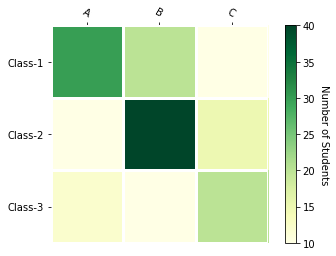

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([
    [30, 20, 10,],
    [10, 40, 15],
    [12, 10, 20]
])
im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')

You can see that the heatmap is quite plain without any textual information to help our readers understand the plot. You will now continue the exercise and add another function that will help us to annotate our **heatmap** visualization.

10. Type and execute the following code in a new cell:

In [3]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    import matplotlib
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


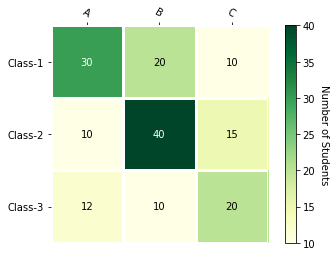

In [4]:
im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')

texts = annotate_heatmap(im, valfmt="{x}")

Note that you put our data in a **numpy** array **(np.array)**. This is because the methods you are going to call expect a **numpy** array.

Next, you plotted our **heatmap** using the heatmap method. You passed in our **data**, the **row** labels, **['Class-1', 'Class-2', 'Class-3']**, and then our **column** labels, **['A', 'B', 'C']**. You also pass in **YlGn** as **cmap**, which means you want to use the color yellow for small values, and the color green for big values. You pass in **cbarlabel** as **Number of Students** to denote that the values we are plotting represent the number of students. Lastly, you annotate our heatmap with the data **(30, 20, 10…)**.

So far, you have learned how to visualize discrete categorical variables using heatmaps and bar plots. But what if you want to visualize a continuous variable? For example, instead of the grades of students, you want to plot the distribution of scores. For this type of data, you should use a density distribution plot, which you will look at in the next exercise.